In [9]:
import keras
import tensorflow as tf  
print(keras.__version__)
print(tf.__version__) 

import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

Using TensorFlow backend.


2.2.4
1.13.1


In [19]:
import pandas as pd 
import numpy as np 

df = pd.read_csv('0424.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
# df.head(2)


label = pd.read_csv('label.txt', sep="\t", header=None)
label.columns = ["ID", "Type"]

df_merge = pd.merge(df, label, on='ID', how='left') 

In [48]:
y_binary = to_categorical(df_merge['Type'])

In [223]:
vocabulary_size = 30000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(df['document'])

sequences = tokenizer.texts_to_sequences(df['document'])
data = pad_sequences(sequences, maxlen=200)


from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data, y_binary, test_size=0.3) 

### Change the folllowing parameters and check the accuracy: 
    1. Vocalbulary_size 
    2. comment_length 
    3. batch_size:  
    4. epochs: 
    5. optimizer: 
    6. Add another lstm layer:  
    7. number of values in each comment 
    8. Add another hidden layer 
    9. Number of nodes in hidden layer 
    10. number of cells in lstm layer 

In [234]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(30000, 64, input_length = 200),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout = 0.2, recurrent_dropout = 0.2)), 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)), 
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(9, activation='sigmoid')
])

# model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train,y_train,
                    epochs=10,batch_size=32,
                    validation_data=(X_test,y_test))

Train on 617 samples, validate on 265 samples
Epoch 1/10
617/617 [==============================] - 19s 30ms/sample - loss: 0.6309 - acc: 0.8439 - val_loss: 0.3739 - val_acc: 0.8889
Epoch 2/10
617/617 [==============================] - 14s 22ms/sample - loss: 0.3381 - acc: 0.8889 - val_loss: 0.3121 - val_acc: 0.8889
Epoch 3/10
617/617 [==============================] - 13s 21ms/sample - loss: 0.3130 - acc: 0.8889 - val_loss: 0.3051 - val_acc: 0.8889
Epoch 4/10
617/617 [==============================] - 13s 21ms/sample - loss: 0.3118 - acc: 0.8889 - val_loss: 0.3060 - val_acc: 0.8889
Epoch 5/10
617/617 [==============================] - 13s 22ms/sample - loss: 0.3091 - acc: 0.8889 - val_loss: 0.3056 - val_acc: 0.8889
Epoch 6/10
617/617 [==============================] - 14s 22ms/sample - loss: 0.3061 - acc: 0.8889 - val_loss: 0.3020 - val_acc: 0.8889
Epoch 7/10
617/617 [==============================] - 14s 23ms/sample - loss: 0.2922 - acc: 0.8916 - val_loss: 0.2958 - val_acc: 0.8910
Ep

In [236]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

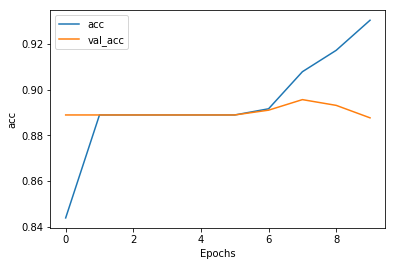

In [237]:
plot_graphs(history, 'acc')

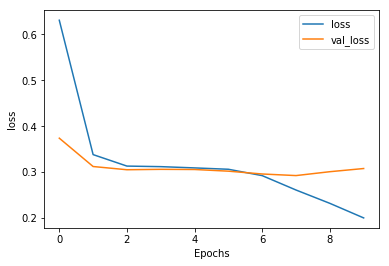

In [238]:
plot_graphs(history, 'loss')

## Add a second LSTM layer 

In [188]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocabulary_size, 128, input_length = 100),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
        64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(9, activation='sigmoid')
])  

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 

history2 = model.fit(X_train,y_train,
                    epochs=10,batch_size=32,
                    validation_data=(X_test,y_test))

Train on 705 samples, validate on 177 samples
Epoch 1/10
705/705 [==============================] - 16s 23ms/sample - loss: 0.5071 - acc: 0.8605 - val_loss: 0.3280 - val_acc: 0.8889
Epoch 2/10
705/705 [==============================] - 12s 16ms/sample - loss: 0.3145 - acc: 0.8889 - val_loss: 0.3112 - val_acc: 0.8889
Epoch 3/10
705/705 [==============================] - 12s 17ms/sample - loss: 0.3127 - acc: 0.8889 - val_loss: 0.3126 - val_acc: 0.8889
Epoch 4/10
705/705 [==============================] - 12s 17ms/sample - loss: 0.3102 - acc: 0.8889 - val_loss: 0.3120 - val_acc: 0.8889
Epoch 5/10
705/705 [==============================] - 12s 17ms/sample - loss: 0.3103 - acc: 0.8889 - val_loss: 0.3118 - val_acc: 0.8889
Epoch 6/10
705/705 [==============================] - 12s 17ms/sample - loss: 0.3080 - acc: 0.8889 - val_loss: 0.3083 - val_acc: 0.8889
Epoch 7/10
705/705 [==============================] - 12s 17ms/sample - loss: 0.2922 - acc: 0.8949 - val_loss: 0.3091 - val_acc: 0.8801
Ep